In [2]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv('/content/pubg_dataset- Sheet.csv')
print(data.head())

          Groupid              Id         Matchid Matchtype  Assists  Boosts  \
0  32dc8ae9572956  4bda15647cb16c  b262d5270ee227      solo        0       0   
1  559ec1194e4a7d  bc952a1b1e62d7  4b8d740dda9ca9     squad        1       3   
2  7d4155b927c232  eb1cc8c533c91f  a3cb2f821cebee       duo        0       3   
3  8e4fcc73aa9046  3d621777a0b77f  9e9a7fc4f76c37     squad        0       0   
4  7f802b015bf341  5ab218d8cd339f  760c1a85499e78       duo        0       0   

  Damagedealt  Headshotkills  Heals  Is Duo  ...  Swimdistance  Teamkills  \
0       53.32              0      0       0  ...           0.0          0   
1       427.5              0      1       0  ...           0.0          0   
2       393.1              1      5       1  ...           0.0          0   
3       142.9              1      0       0  ...           0.0          0   
4       61.64              0      3       1  ...           0.0          1   

   Vehicledestroys  Walkdistance Weaponsacquired  Winpla

In [4]:
print(data.info())
print(data.describe())
print(data.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 34 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Groupid              5000 non-null   object 
 1   Id                   5000 non-null   object 
 2   Matchid              5000 non-null   object 
 3   Matchtype            5000 non-null   object 
 4   Assists              5000 non-null   int64  
 5   Boosts               5000 non-null   int64  
 6   Damagedealt          5000 non-null   object 
 7   Headshotkills        5000 non-null   int64  
 8   Heals                5000 non-null   int64  
 9   Is Duo               5000 non-null   int64  
 10  Is Squad             5000 non-null   int64  
 11  Kills                5000 non-null   int64  
 12  Killstreaks          5000 non-null   int64  
 13  Longestkill          5000 non-null   float64
 14  Matchduration        5000 non-null   object 
 15  Matchkillrank        5000 non-null   i

In [7]:
# Selecting columns
selected_features = ['Damagedealt', 'Kills', 'Longestkill', 'Walkdistance', 'Winplaceperc']
X = data[selected_features]

# converting string to numeric
if X['Damagedealt'].dtype == object:
    X['Damagedealt'] = pd.to_numeric(X['Damagedealt'].str.replace(',', ''))
if X['Walkdistance'].dtype == object:
    X['Walkdistance'] = pd.to_numeric(X['Walkdistance'].str.replace(',', ''))

# Data standardization
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

<ipython-input-7-efb4e2ae0951>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Damagedealt'] = pd.to_numeric(X['Damagedealt'].str.replace(',', ''))


In [9]:
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X_scaled)

data['Cluster'] = kmeans.labels_
print(data[['Cluster'] + selected_features].head())


   Cluster Damagedealt  Kills  Longestkill  Walkdistance  Winplaceperc
0        0       53.32      0        0.000         603.6        0.6354
1        2       427.5      3      181.800        2716.0        0.9615
2        1       393.1      3       29.670        2107.0        0.8511
3        0       142.9      2       21.610         161.3        0.0769
4        0       61.64      1        2.046         455.8        0.3125


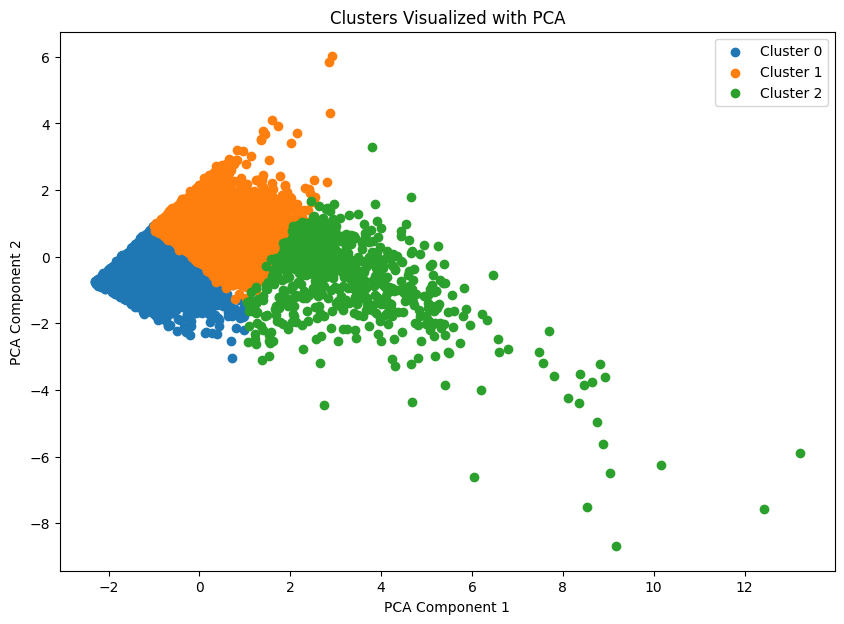

In [10]:
# Reducing to 2 components
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Plotting the clusters
plt.figure(figsize=(10, 7))
for cluster in range(3):
    plt.scatter(
        X_pca[kmeans.labels_ == cluster, 0],
        X_pca[kmeans.labels_ == cluster, 1],
        label=f'Cluster {cluster}'
    )

plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('Clusters Visualized with PCA')
plt.legend()
plt.show()
